In [4]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [5]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
num_class = 10

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

In [33]:
y_train

array([[[[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
    

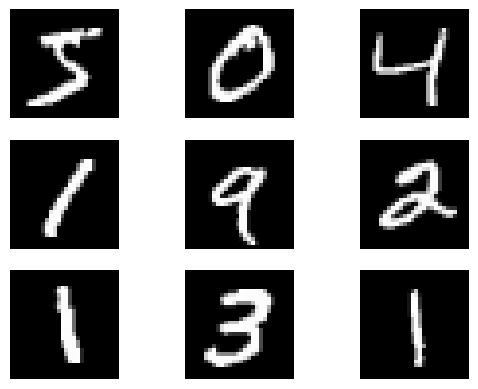

In [34]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')

plt.show()

In [42]:
x_train = X_train.reshape(60000,784)
x_test = X_test.reshape(10000,784)

In [43]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [44]:
model_data = keras.Sequential()

In [45]:
#Input Layer
model_data.add(layers.Dense(512,activation='relu',input_dim=784))

#Hidden Layer
model_data.add(layers.Dense(256,activation='relu'))
model_data.add(layers.Dense(128,activation='relu'))

#Output Layer
model_data.add(layers.Dense(10,activation='softmax'))

In [46]:
model_data.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [47]:
Optimizer = optimizers.Adam(learning_rate=0.0001)

model_data.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

In [55]:
predictions = model_data.predict(x_test)

313/313 [==============================] - 1s 4ms/step


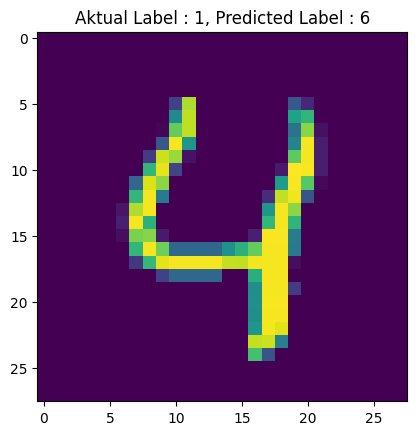

In [53]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[4])



img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")

plt.imshow(img)
plt.show()